# AOS: calculating OPD metrics - FWHM and PSSN 

Optical Path Difference and wavefront error (WFE) are just two different names for the same error - the deviation of the true wavefront from the perfectly spherical wavefront :
    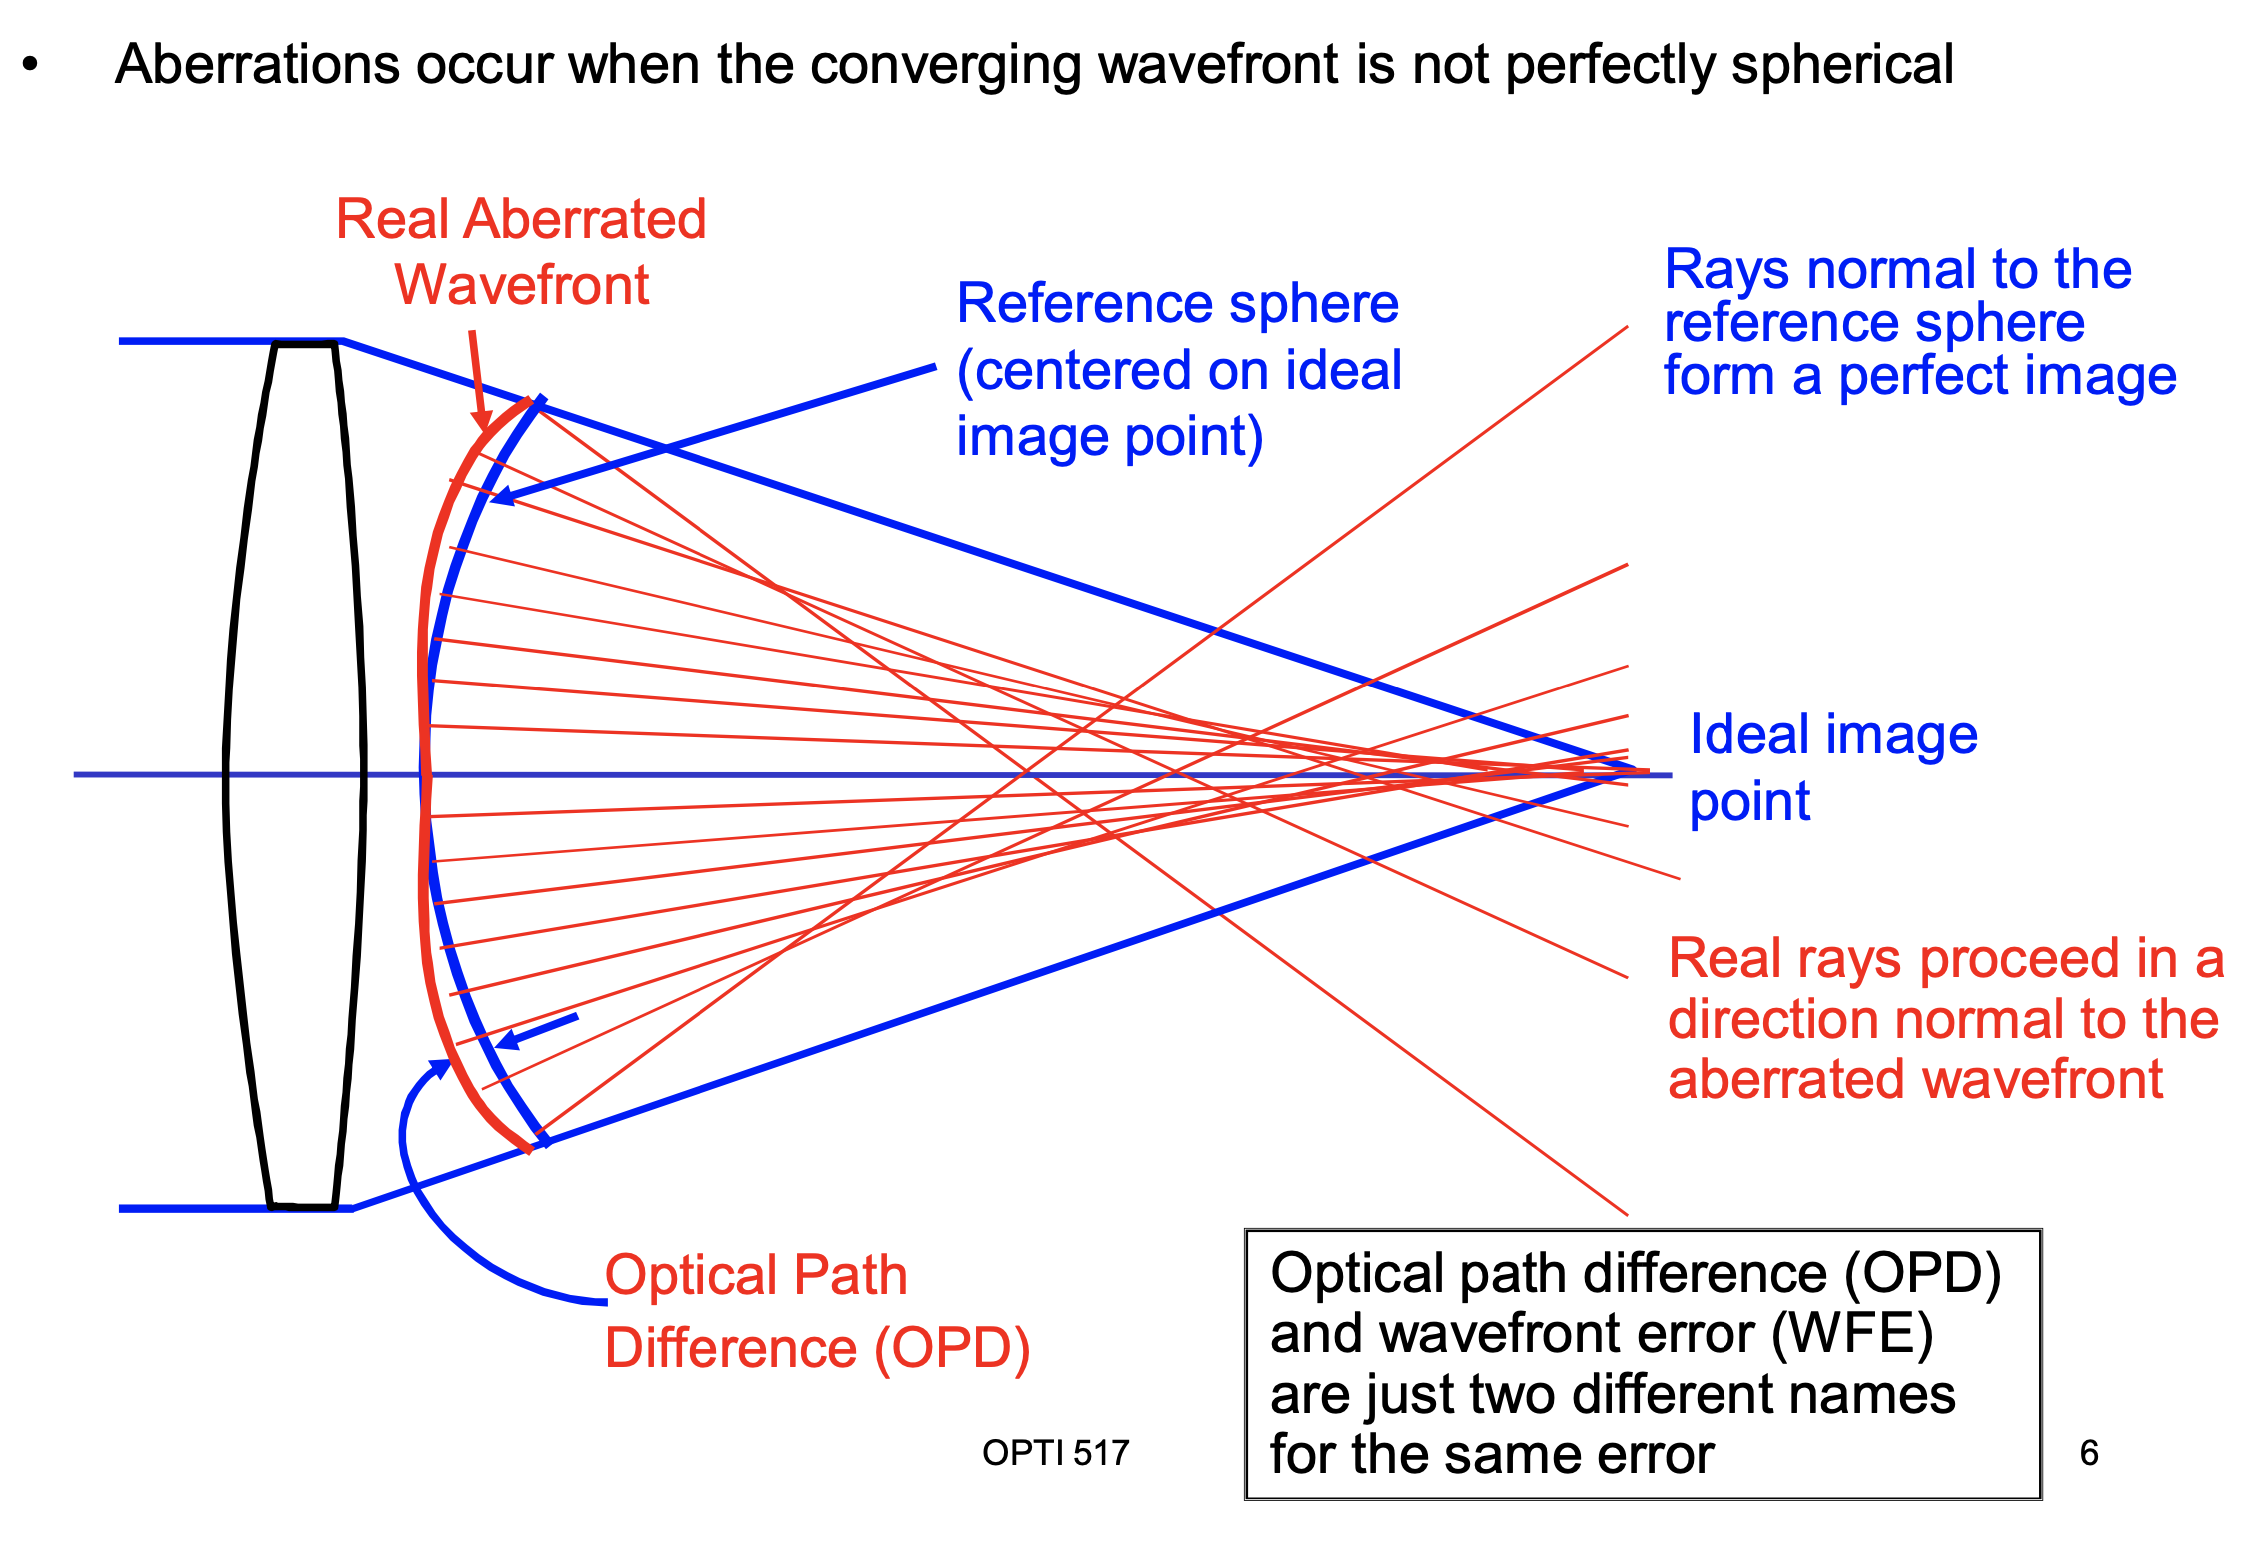
    
Then in the AOs loop we often plot the OPD (wavefront error) as this 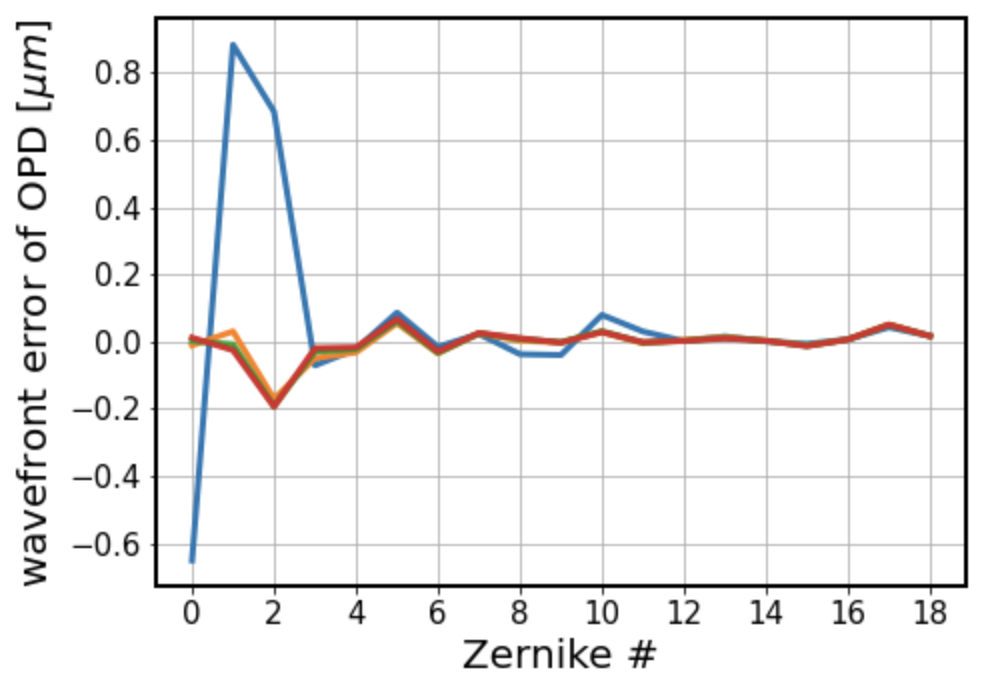. We plot here the content of  `opdData =  'iterN/img/opd.zer'`  as `np.mean(opdData, axis=0)`, with the mean taken across the places where OPD was evaluated (eg. 9 CCD centers for comCam, or 31 field locations for lsstComCam). The label should actually say "wavefront error (OPD)" (update `analysisTools.py`). 

Given that, a perfect telescope that does not affect the wavefront in any way would have zero OPD, and PSSN=1 - see comment in https://github.com/lsst-ts/ts_phosim/blob/f55c6b27b1df4b8d0fbad541f9fb3b1934a57fd7/python/lsst/ts/phosim/utils/MetroTool.py#L135 

The documents that talk about PSSN:
* "Optical Performance of LSST Primary-Tertiary Mirror" https://docushare.lsstcorp.org/docushare/dsweb/Get/Document-17171 and 
* "Normalized Point Source Sensitivity for LSST" https://docushare.lsst.org/docushare/dsweb/Get/Document-17242/PSSN%20for%20LSST%20v12.pdf

Take OPD and the calculated PSSN, FWHM values from a simulation. This is running the baseline for comcam:

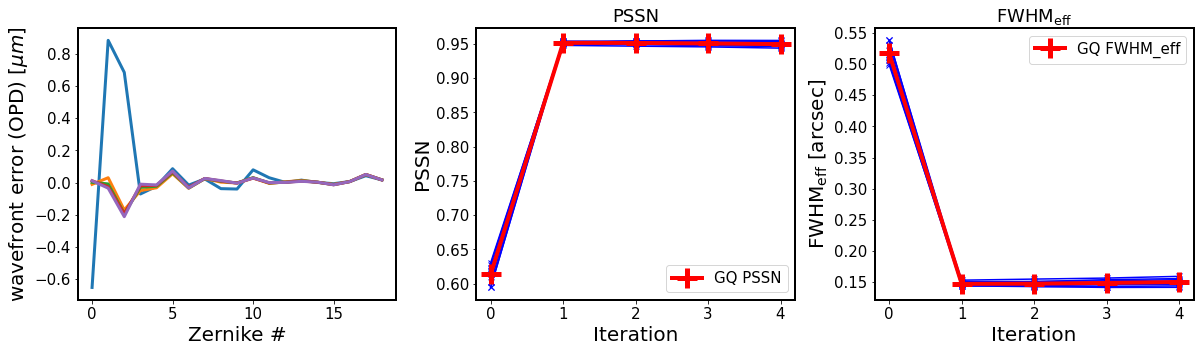

In [14]:
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

# common functions for AOS analysis
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
data_dir='/project/scichris/aos/refcats_DM-34547/imgCloseLoop2/'
iterNum=5
num_ccds = 9 
testLabel=''
opdPssnFileName='PSSN.txt'

opdDataDic = {}
wfsDataDic = {}
pssn_data = []
fwhm_data = []
opdOnly=True
for iterCount in range(iterNum):
    # load the OPD data 
    opdZkFilePath = os.path.join(data_dir,  'iter%d/img/opd.zer%s'%(iterCount,
                                                                     testLabel))
    opdData = np.loadtxt(opdZkFilePath)
    opdDataDic[iterCount] = opdData

#     if not opdOnly:
#         # load the wavefront error data 
#         wfsZkFilePath = os.path.join(data_dir,  'iter%d/img/wfs.zer%s'%(iterCount,
#                                                                      testLabel))
#         wfsData = np.loadtxt(wfsZkFilePath)
#         wfsDataDic[iterCount] = wfsData

    # load the PSSN and FWHM data 
    pssn_filename = os.path.join(data_dir, 'iter%i' % iterCount, 
                                 'img/%s'%opdPssnFileName)
    pssn_file_array = np.genfromtxt(pssn_filename)
    pssn_data.append(pssn_file_array[0])
    fwhm_data.append(pssn_file_array[1])
pssn_data = np.array(pssn_data)
fwhm_data = np.array(fwhm_data)

if not opdOnly:
    fig,axs = plt.subplots(2,2,figsize=(16,12)
                        )
else:
    fig,axs = plt.subplots(1,3,figsize=(20,5)
                        )
ax = np.ravel(axs)

# 0: plot the OPD 

# to compare the two, need  to somehow "average" the OPD ? 
# plot the values of zernikes at different field points...
k = 0 
for iterCount in range(iterNum):
    opdData = opdDataDic[iterCount]
#     for i in range(np.shape(opdData)[0]):
#         ax.plot(opdData[i,:], lw=1,ls='--')
    # plot the average of these ... 
    ax[k].plot(np.mean(opdData, axis=0), lw=3,ls='-' ,)

ax[k].set_xlabel('Zernike #')
ax[k].set_ylabel('wavefront error (OPD) '+r'$[\mu m]$')

# 2: plot PSSN 
k += 1 
for i in range(num_ccds):
    ax[k].plot(np.arange(iterNum), pssn_data[:,i], c='b', marker='x')
ax[k].plot(np.arange(iterNum), pssn_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ PSSN')
ax[k].legend()
ax[k].set_xlabel('Iteration')
ax[k].set_ylabel('PSSN')
ax[k].set_title('PSSN')
# plt.xticks(size=14)
# plt.yticks(size=14)


# 3: plot the FWHM 
k +=1 
for i in range(num_ccds):
    ax[k].plot(np.arange(iterNum), fwhm_data[:,i], c='b', marker='x')
ax[k].plot(np.arange(iterNum), fwhm_data[:,num_ccds], lw=4, marker='+',
         ms=20, markeredgewidth=5, c='r', label='GQ FWHM_eff')
ax[k].legend()
ax[k].set_xlabel('Iteration')
ax[k].set_ylabel(r'$\mathrm{FWHM}_{\mathrm{eff}}$ [arcsec]')
ax[k].set_title(r'$\mathrm{FWHM}_{\mathrm{eff}}$')
# plt.xticks(size=14)
# plt.yticks(size=14)
fig.subplots_adjust(wspace=0.25)

In [1]:
import numpy as np 

In [2]:
s = 0.35
np.sqrt(s**2+s**2)

0.49497474683058323

In [3]:
np.sqrt(0.49**2+0.6**2)

0.7746612162745725

In [4]:
np.sqrt(0.35**2+0.6**2)

0.6946221994724903

In [9]:
pssn = 0.99
eta = 1.086
FWHMatm = 0.6
FWHMeff = eta * FWHMatm * np.sqrt(1 / pssn - 1)
print(FWHMeff)

0.06548826404229048


In [1]:
pwd

'/project/scichris/aos/AOS'

In [2]:
a = None

In [3]:
a == None

True

In [4]:
a is None

True

Perhaps it doubles what you already know, but from my notes I find that we calculate  OPD (wavefront error) --> PSSN ---> FWHM . The FWHM is the FWHM_effective, i.e. FWHMeff = eta * FWHMatm * sqrt(1 / pssn - 1), with eta=1.086 and FWHMatm=0.6 arcsec ( https://github.com/lsst-ts/ts_phosim/blob/f55c6b27b1df4b8d0fbad541f9fb3b1934a57fd7/python/lsst/ts/phosim/OpdMetrology.py#L402-L430 ) .  I studied the SRD, and I see the 0.69'' design seeing requirement, which assumes 0.6'' atmospheric seeing, and 0.35'' telescope+camera seeing. 0.6 and 0.35 added in quadrature yields exactly 0.69. 